# 降维、特征提取与流形学习

&emsp;&emsp;无监督学习进行数据变换可能有很多种目的,最常见的目的就是可视化、压缩数据，以及寻找信息量更大的数据表示以用于进一步的处理。    

&emsp;&emsp;为了实现这些目的，最简单也最常用的一种算法就是主成分分析。另外两种算法:非负矩阵分解(NMF)和-SNE，前者通常用于特征提取，后者通常用于二维散点图的可视化。

## 1. 主成分分析

主成分分析(principal componentanalysis，PCA)是一种旋转数据集的方法，旋转后的特征在统计上不相关。在做完这种旋转之后，通常是根据新特征对解释数据的重要性来选择他的子集

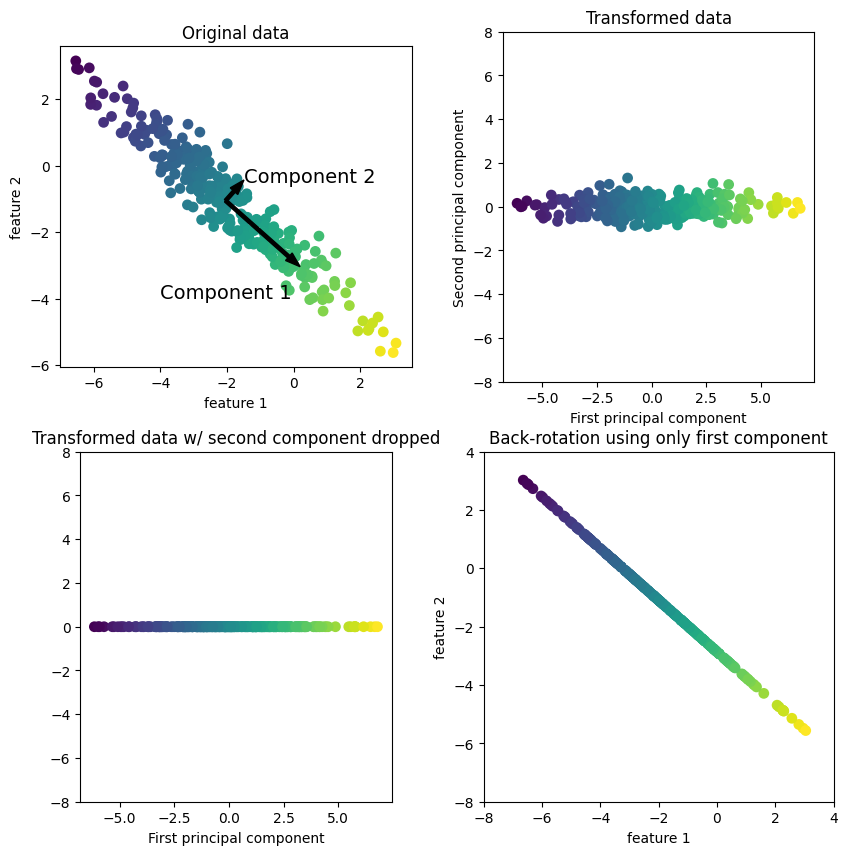

In [1]:
import mglearn
mglearn.plots.plot_pca_illustration()

第一张图(左上)显示的是原始数据点，用不同颜色加以区分。算法首先找到方差最大的方向，将其标记为“成分1”(Component 1)。这是数据中包含最多信息的方向 (或向量).换句话说，沿着这个方向的特征之间最为相关。然后，算法找到与第一个方向正交(成直角)且包含最多信息的方向。在二维空间中，只有一个成直角的方向，但在更高维的空间中会有(无穷)多的正交方向。虽然这两个成分都画成箭头，但其头尾的位置并不重要我们也可以将第一个成分画成从中心指向左上，而不是指向右下。利用这一过程找到的方向被称为主成分(principal component)，因为它们是数据方差的主要方向。一般来说，主成分的个数与原始特征相同。

第二张图(右上)显示的是同样的数据，但现在将其旋转，使得第一主成分与，轴平行且第二主成分与v轴平行。在旋转之前，从数据中减去平均值，使得变换后的数据以零为中心。在 PCA 找到的旋转表示中，两个坐标轴是不相关的，也就是说，对于这种数据表示除了对角线，相关矩阵全部为零。第二张图(右上)显示的是同样的数据，但现在将其旋转，使得第一主成分与，轴平行且第二主成分与v轴平行。在旋转之前，从数据中减去平均值，使得变换后的数据以零为中心。在 PCA 找到的旋转表示中，两个坐标轴是不相关的，也就是说，对于这种数据表示除了对角线，相关矩阵全部为零。

我们可以通过仅保留一部分主成分来使用PCA 进行降维。在这个例子中，我们可以仅保留第一个主成分，正如图中第三张图所示(左下)。这将数据从二维数据集降为一维数据集。但要注意，我们没有保留原始特征之一，而是找到了最有趣的方向 (第一张图中从左上到右下)并保留这一方向，即第一主成分。

最后，我们可以反向旋转并将平均值重新加到数据中。这样会得到最后一张图中的数据。这些数据点位于原始特征空间中，但我们仅保留了第一主成分中包含的信息。这种变换有时用于去除数据中的噪声影响，或者将主成分中保留的那部分信息可视化。

### (1)将PCA应用于cancer数据集并可视化

PCA 最常见的应用之一就是将高维数据集可视化。对于有两个以上特征的数据，很难绘制散点图。对于 Iris (鸢尾花) 数据集可以创建散点图矩阵(如下图)，通过展示特征所有可能的两两组合来展示数据的局部图像。但如果我们想要查看乳腺癌数据集，即便用散点图矩阵也很困难。这个数据集包含30个特征，这就导致需要绘制30*14=420张散点图!我们永远不可能仔细观察所有这些图像，更不用说试图理解它们了

不过我们可以使用一种更简单的可视化方法一一对每个特征分别计算两个类别(良性肿瘤和恶性肿瘤)的直方图 。

d:\python\lib\site-packages\pandas\plotting\_matplotlib\misc.py:97: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(


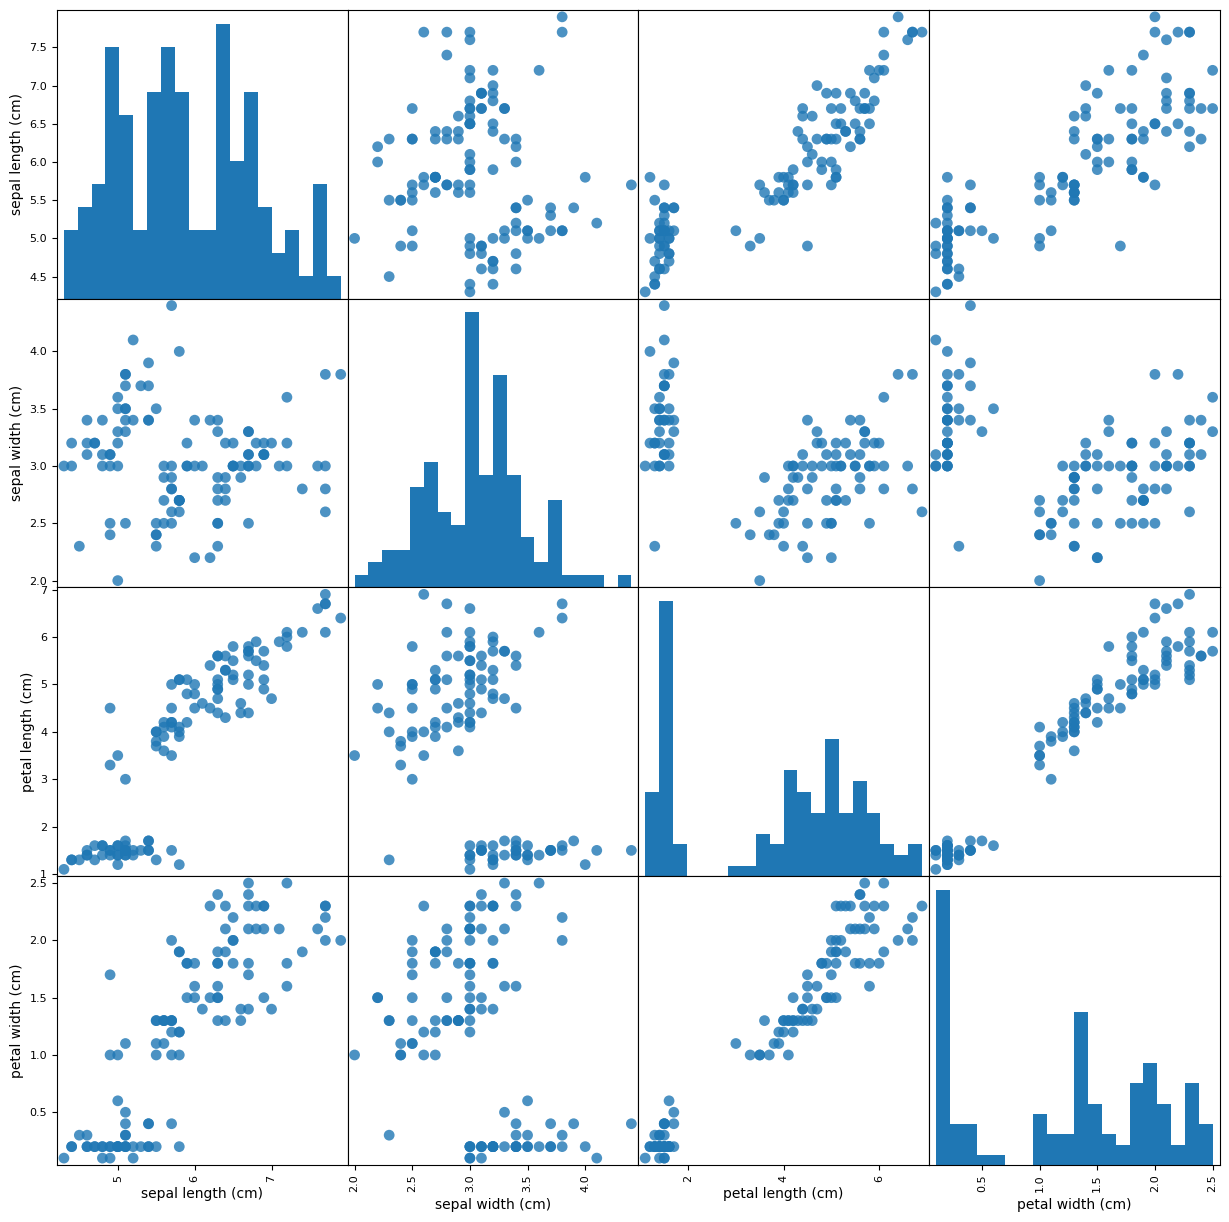

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import mglearn
import pandas as pd

iris = load_iris()
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=0)

iris_ = pd.DataFrame(X_train,columns=iris.feature_names)
grr = pd.plotting.scatter_matrix(iris_, figsize=(15,15), marker='o', 
                                 hist_kwds={'bins':20}, s=60, alpha=.8, cmap=mglearn.cm3)

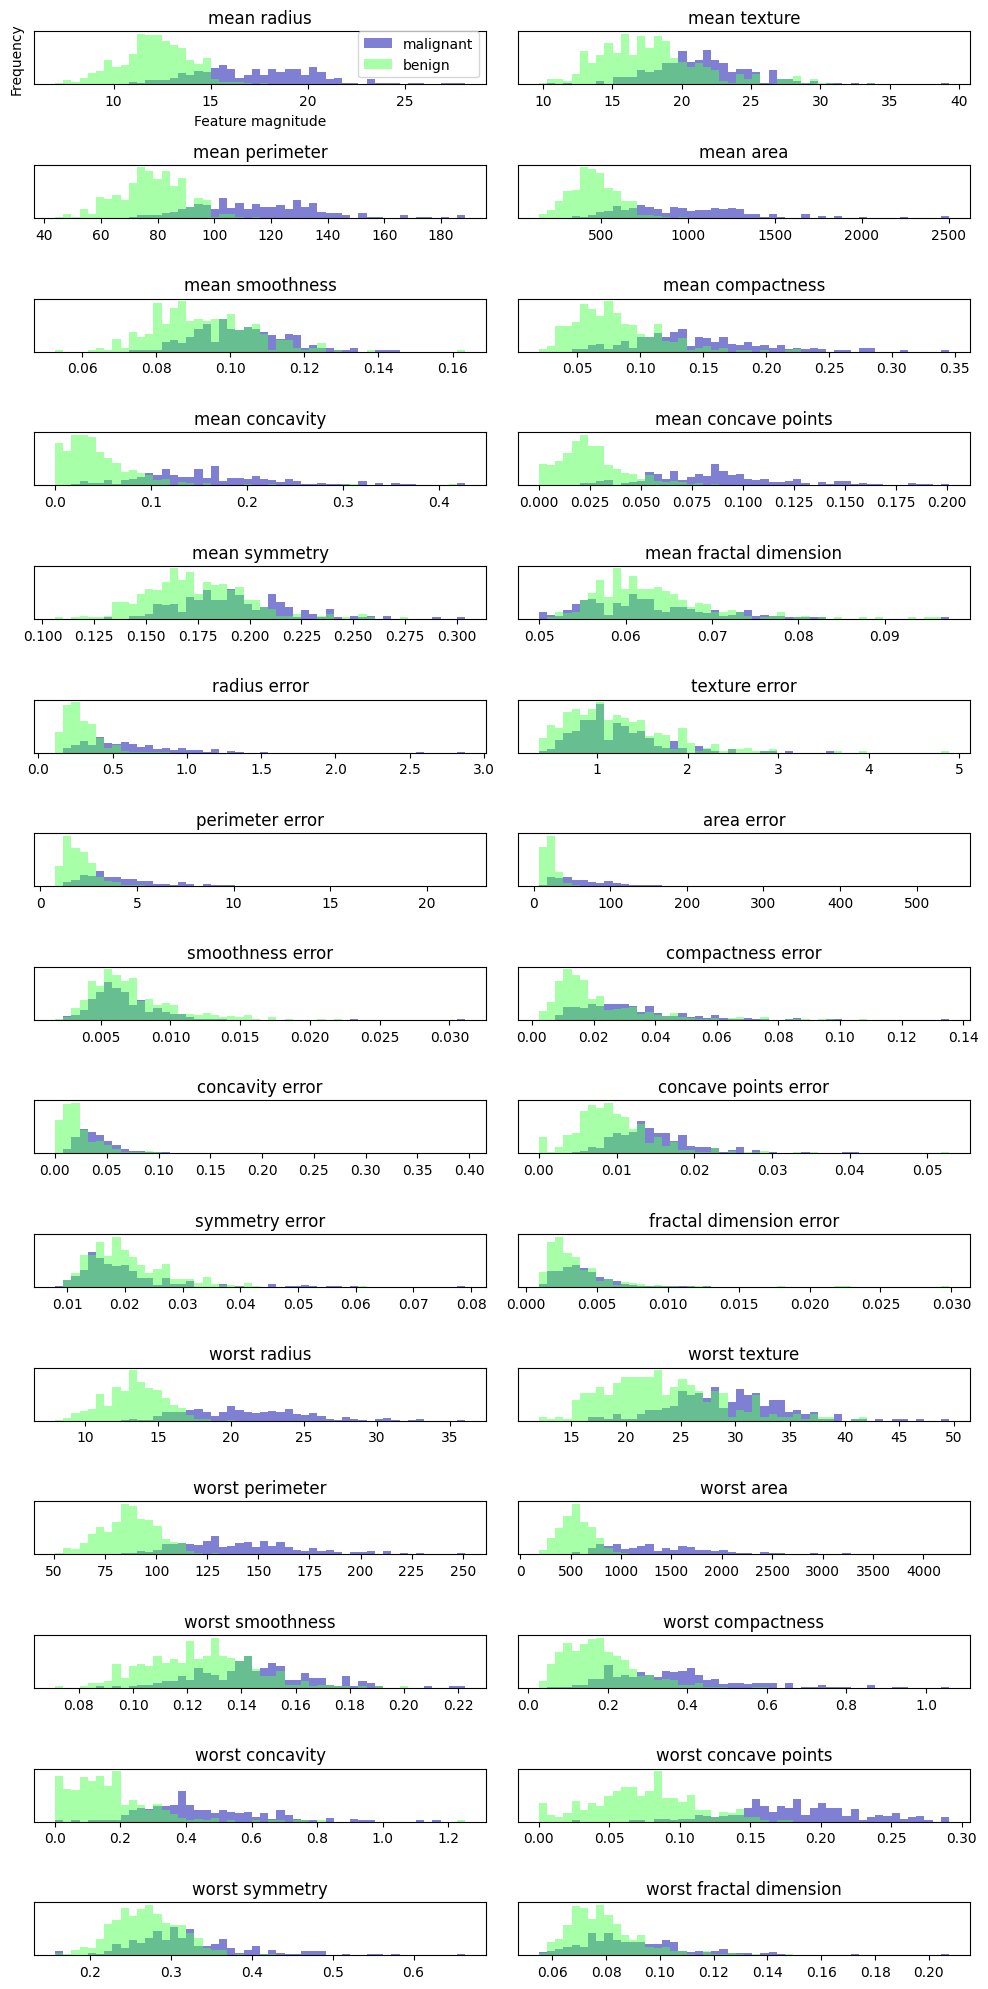

In [14]:
# 每个特征分别计算两个类别(良性肿瘤和恶性肿瘤)的直方图
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np



fig, axes = plt.subplots(15, 2, figsize=(10,20))
cancer = load_breast_cancer()
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]

ax = axes.ravel() # 将多维数组（如矩阵）转换成一维数组

for i in range(30):
    #  变量bins将存储这 50 个箱的边缘或边界。它是一个定义数据范围划分点的数组。
    _, bins = np.histogram(cancer.data[:, i], bins=50) 
    # bins=bins指定应使用与之前计算的相同的 bin 边缘。
    # color设置直方图的颜色。
    # alpha=.5将直方图的透明度设置为 0.5。
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(cancer.feature_names[i])
    ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()

# 乳腺癌数据集中每个特征的直方图

这里我们为每个特征创建一个直方图，计算具有某一特征的数据点在特定范围内(叫作bin)的出现频率。每张图都包含两个直方图，一个是良性类别的所有点(蓝色)，一个是恶性类别的所有点(红色)。这样我们可以了解每个特征在两个类别中的分布情况，也可以猜测哪些特征能够更好地区分良性样本和恶性样本。例如，“smoothness error”特征似乎没有什么信息量，因为两个直方图大部分都重叠在一起，而“worst concave points”特征看起来信息量相当大，因为两个直方图的交集很小。

但是，这种图无法向我们展示变量之间的相互作用以及这种相互作用与类别之间的关系。利用 PCA，我们可以获取到主要的相互作用，并得到稍为完整的图像。我们可以找到前两个主成分，并在这个新的二维空间中用散点图将数据可视化。

在应用PCA之前，我们利用 standardScaler 缩放数据，使每个特征的方差均为1:

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaler = scaler.transform(cancer.data)

学习并应用PCA变换与应用预处理变换一样简单。我们将PCA 对象实例化，调用fit 方法找到主成分，然后调用 transform 来旋转并降维。默认情况下，PCA仅旋转 (并移动)数据，但保留所有的主成分。为了降低数据的维度，我们需要在创建 PCA对象时指定想要保留的主成分个数:

In [18]:
from sklearn.decomposition import PCA
# 保留数据的前两个主成分
pca = PCA(n_components=2)
# 对乳腺癌数据集拟合PCA模型
pca.fit(X_scaler)

# 将数据变换到前两个主成分的方向上
X_pca = pca.transform(X_scaler)
print("Original shape: {}".format(X_scaler.shape))
print("Reduced shape: {}".format(X_pca.shape))


Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

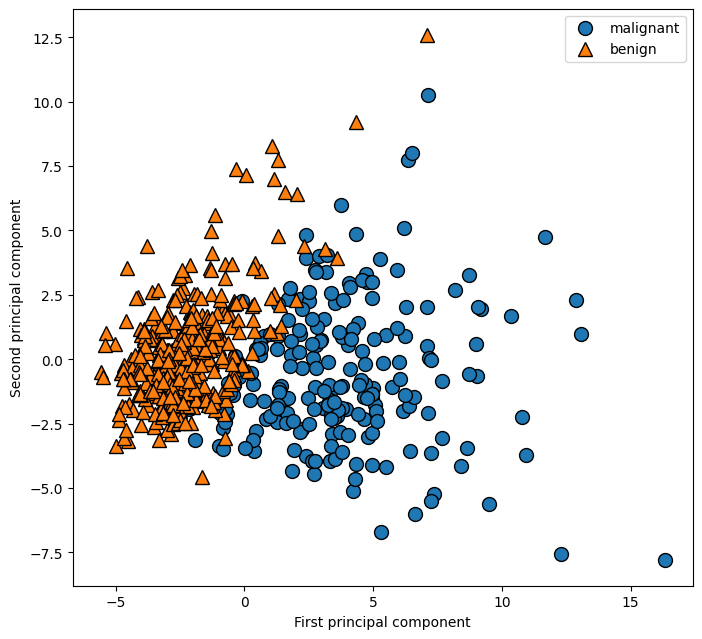

In [19]:
# 对第一个和第二个主成分作图，按类别着色
plt.figure(figsize=(8,8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
# loc='best' 是一个特殊的选项，它会尝试自动选择一个合适的位置来放置图例，以使其不会遮挡数据。
plt.legend(cancer.target_names, loc='best') 
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')


In [ ]:
18313535302